In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df1 = pd.read_excel('employees.xls')

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EMPLOYEE_ID     107 non-null    int64  
 1   FIRST_NAME      107 non-null    object 
 2   LAST_NAME       107 non-null    object 
 3   EMAIL           107 non-null    object 
 4   PHONE_NUMBER    107 non-null    object 
 5   HIRE_DATE       107 non-null    object 
 6   JOB_ID          107 non-null    object 
 7   SALARY          107 non-null    int64  
 8   COMMISSION_PCT  35 non-null     float64
 9   MANAGER_ID      106 non-null    float64
 10  DEPARTMENT_ID   106 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 9.3+ KB


In [124]:
df1.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17 00:00:00,AD_PRES,24000,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21 00:00:00,AD_VP,17000,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13 00:00:00,AD_VP,17000,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03 00:00:00,IT_PROG,9000,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21 00:00:00,IT_PROG,6000,NaN,103.0,60.0


In [125]:
df2 = pd.read_excel('departments.xls')
df2.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,DEPARTMENT_ID,DEPARTMENT_NAME,MANAGER_ID,LOCATION_ID
0,10,Administration,200.0,1700
1,20,Marketing,201.0,1800
2,30,Purchasing,114.0,1700
3,40,Human Resources,203.0,2400
4,50,Shipping,121.0,1500


In [126]:
df3 = pd.read_excel("jobs.xls")
df3.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,JOB_ID,JOB_TITLE,MIN_SALARY,MAX_SALARY
0,AC_ACCOUNT,Public Accountant,4200,9000
1,AC_MGR,Accounting Manager,8200,16000
2,AD_ASST,Administration Assistant,3000,6000
3,AD_PRES,President,20080,40000
4,AD_VP,Administration Vice President,15000,30000


In [127]:
# bỏ bớt các cột ( nếu buốn bỏ cột na thì dùng function : dropna())
emp = df1.drop(['EMAIL','PHONE_NUMBER','COMMISSION_PCT','MANAGER_ID'],axis=1)
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EMPLOYEE_ID    107 non-null    int64  
 1   FIRST_NAME     107 non-null    object 
 2   LAST_NAME      107 non-null    object 
 3   HIRE_DATE      107 non-null    object 
 4   JOB_ID         107 non-null    object 
 5   SALARY         107 non-null    int64  
 6   DEPARTMENT_ID  106 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 6.0+ KB


In [128]:
emp[emp['DEPARTMENT_ID'].isnull()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,JOB_ID,SALARY,DEPARTMENT_ID
78,178,Kimberely,Grant,2007-05-24 00:00:00,SA_REP,7000,NaN


In [129]:
# xếp lại các côt
emp = emp[['EMPLOYEE_ID','FIRST_NAME','LAST_NAME','HIRE_DATE','SALARY','DEPARTMENT_ID','JOB_ID']]

In [130]:
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP
3,103,Alexander,Hunold,2006-01-03 00:00:00,9000,60.0,IT_PROG
4,104,Bruce,Ernst,2007-05-21 00:00:00,6000,60.0,IT_PROG


In [131]:
#nối cột các dữ liệu
emp = pd.merge(emp,df2[['DEPARTMENT_ID','DEPARTMENT_NAME']],how='left')
emp = pd.merge(emp,df3[['JOB_ID','JOB_TITLE']],how='left')

In [132]:
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
3,103,Alexander,Hunold,2006-01-03 00:00:00,9000,60.0,IT_PROG,IT,Programmer
4,104,Bruce,Ernst,2007-05-21 00:00:00,6000,60.0,IT_PROG,IT,Programmer


In [133]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EMPLOYEE_ID      107 non-null    int64  
 1   FIRST_NAME       107 non-null    object 
 2   LAST_NAME        107 non-null    object 
 3   HIRE_DATE        107 non-null    object 
 4   SALARY           107 non-null    int64  
 5   DEPARTMENT_ID    106 non-null    float64
 6   JOB_ID           107 non-null    object 
 7   DEPARTMENT_NAME  106 non-null    object 
 8   JOB_TITLE        107 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 8.4+ KB


In [134]:
# lấy dữ liệu emp theo dep sau đó sort theo cột giảm dần
emp[emp['DEPARTMENT_ID']==50].sort_values(by=['SALARY'],ascending=False)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
21,121,Adam,Fripp,2005-04-10 00:00:00,8200,50.0,ST_MAN,Shipping,Stock Manager
20,120,Matthew,Weiss,2004-07-18 00:00:00,8000,50.0,ST_MAN,Shipping,Stock Manager
22,122,Payam,Kaufling,2003-05-01 00:00:00,7900,50.0,ST_MAN,Shipping,Stock Manager
23,123,Shanta,Vollman,2005-10-10 00:00:00,6500,50.0,ST_MAN,Shipping,Stock Manager
24,124,Kevin,Mourgos,2007-11-16 00:00:00,5800,50.0,ST_MAN,Shipping,Stock Manager
84,184,Nandita,Sarchand,2004-01-27 00:00:00,4200,50.0,SH_CLERK,Shipping,Shipping Clerk
85,185,Alexis,Bull,2005-02-20 00:00:00,4100,50.0,SH_CLERK,Shipping,Shipping Clerk
92,192,Sarah,Bell,2004-02-04 00:00:00,4000,50.0,SH_CLERK,Shipping,Shipping Clerk
93,193,Britney,Everett,2005-03-03 00:00:00,3900,50.0,SH_CLERK,Shipping,Shipping Clerk
88,188,Kelly,Chung,2005-06-14 00:00:00,3800,50.0,SH_CLERK,Shipping,Shipping Clerk


In [135]:
emp[(emp['SALARY']>=5000) & (emp['SALARY']<=7000) & (emp['DEPARTMENT_NAME']=='Sales')]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
55,155,Oliver,Tuvault,2007-11-23 00:00:00,7000,80.0,SA_REP,Sales,Sales Representative
61,161,Sarath,Sewall,2006-11-03 00:00:00,7000,80.0,SA_REP,Sales,Sales Representative
65,165,David,Lee,2008-02-23 00:00:00,6800,80.0,SA_REP,Sales,Sales Representative
66,166,Sundar,Ande,2008-03-24 00:00:00,6400,80.0,SA_REP,Sales,Sales Representative
67,167,Amit,Banda,2008-04-21 00:00:00,6200,80.0,SA_REP,Sales,Sales Representative
73,173,Sundita,Kumar,2008-04-21 00:00:00,6100,80.0,SA_REP,Sales,Sales Representative
79,179,Charles,Johnson,2008-01-04 00:00:00,6200,80.0,SA_REP,Sales,Sales Representative


In [136]:
emp[emp['DEPARTMENT_NAME'].isnull()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
78,178,Kimberely,Grant,2007-05-24 00:00:00,7000,NaN,SA_REP,NaN,Sales Representative


In [137]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EMPLOYEE_ID      107 non-null    int64  
 1   FIRST_NAME       107 non-null    object 
 2   LAST_NAME        107 non-null    object 
 3   HIRE_DATE        107 non-null    object 
 4   SALARY           107 non-null    int64  
 5   DEPARTMENT_ID    106 non-null    float64
 6   JOB_ID           107 non-null    object 
 7   DEPARTMENT_NAME  106 non-null    object 
 8   JOB_TITLE        107 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 8.4+ KB


In [138]:
# câu 9
emp['SALARY'].describe()

count      107.000000
mean      6461.831776
std       3909.579731
min       2100.000000
25%       3100.000000
50%       6200.000000
75%       8900.000000
max      24000.000000
Name: SALARY, dtype: float64

In [139]:
emp[emp['SALARY']>emp['SALARY'].mean()].sort_values(by=['SALARY'],ascending=False).sort_values(by=['DEPARTMENT_NAME']).head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
105,205,Shelley,Higgins,2002-06-07 00:00:00,12008,110.0,AC_MGR,Accounting,Accounting Manager
106,206,William,Gietz,2002-06-07 00:00:00,8300,110.0,AC_ACCOUNT,Accounting,Public Accountant
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President


In [140]:
emp[emp['SALARY']==emp['SALARY'].max()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President


In [141]:
emp[emp['SALARY']==emp['SALARY'].min()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
32,132,TJ,Olson,2007-04-10 00:00:00,2100,50.0,ST_CLERK,Shipping,Stock Clerk


In [162]:
bonus = emp[['EMPLOYEE_ID','FIRST_NAME','SALARY']]
bonus['BONUS'] = bonus['SALARY'] + 500
bonus.head()

<ipython-input-162-1cc87a67c143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bonus['BONUS'] = bonus['SALARY'] + 500


,EMPLOYEE_ID,FIRST_NAME,SALARY,BONUS
0,100,Steven,24000,24500
1,101,Neena,17000,17500
2,102,Lex,17000,17500
3,103,Alexander,9000,9500
4,104,Bruce,6000,6500


In [186]:
nam_vao_lam = emp[['EMPLOYEE_ID','FIRST_NAME','HIRE_DATE']]
split = nam_vao_lam['HIRE_DATE'].str.split("-")
split1=[]
for i in range(len(split)):
    split1.append(int(split[i][0]))
nam = pd.DataFrame(split1)
nam_vao_lam['NAM_VAO_LAM'] = nam
nam_vao_lam.drop(['HIRE_DATE'],axis=1)

<ipython-input-186-9b8b6db9e89e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nam_vao_lam['NAM_VAO_LAM'] = nam


,EMPLOYEE_ID,FIRST_NAME,NAM_VAO_LAM
0,100,Steven,2003
1,101,Neena,2005
2,102,Lex,2001
3,103,Alexander,2006
4,104,Bruce,2007
...,...,...,...
102,202,Pat,2005
103,203,Susan,2002
104,204,Hermann,2002
105,205,Shelley,2002


In [201]:
dep = emp.groupby(by='DEPARTMENT_NAME').SALARY.describe()
sum1= emp.groupby(by='DEPARTMENT_NAME').SALARY.sum()
kq = dep[['count','max','min','mean']]
kq['sum']=sum1
kq

<ipython-input-201-a6297f6dd34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kq['sum']=sum1


,count,max,min,mean,sum
DEPARTMENT_NAME,,,,,
Accounting,2.0,12008.0,8300.0,10154.000000,20308
Administration,1.0,4400.0,4400.0,4400.000000,4400
Executive,3.0,24000.0,17000.0,19333.333333,58000
Finance,6.0,12008.0,6900.0,8601.333333,51608
Human Resources,1.0,6500.0,6500.0,6500.000000,6500


In [202]:
dep = emp.groupby(by='DEPARTMENT_NAME').SALARY.agg(['count','max','min','mean','sum'])
dep

,count,max,min,mean,sum
DEPARTMENT_NAME,,,,,
Accounting,2,12008,8300,10154.000000,20308
Administration,1,4400,4400,4400.000000,4400
Executive,3,24000,17000,19333.333333,58000
Finance,6,12008,6900,8601.333333,51608
Human Resources,1,6500,6500,6500.000000,6500
IT,5,9000,4200,5760.000000,28800
Marketing,2,13000,6000,9500.000000,19000
Public Relations,1,10000,10000,10000.000000,10000
Purchasing,6,11000,2500,4150.000000,24900


In [292]:
nam1 = nam_vao_lam[['NAM_VAO_LAM','EMPLOYEE_ID']].groupby(by='NAM_VAO_LAM',as_index=False).count()
nam1

,NAM_VAO_LAM,EMPLOYEE_ID
0,2001,1
1,2002,7
2,2003,6
3,2004,10
4,2005,29
5,2006,24
6,2007,19
7,2008,11


In [271]:
emp10 = emp[['DEPARTMENT_ID','EMPLOYEE_ID']].groupby(['DEPARTMENT_ID'],as_index=False).count()
emp10

,DEPARTMENT_ID,EMPLOYEE_ID
0,10.0,1
1,20.0,2
2,30.0,6
3,40.0,1
4,50.0,45
5,60.0,5
6,70.0,1
7,80.0,34
8,90.0,3
9,100.0,6


Text(0, 0.5, 'count')

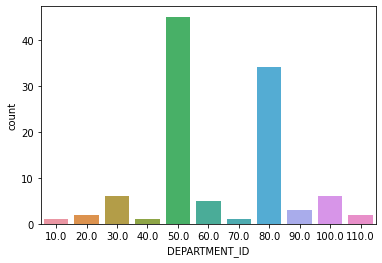

In [275]:
sns.barplot(data=emp10,x='DEPARTMENT_ID',y='EMPLOYEE_ID')
plt.ylabel('count')

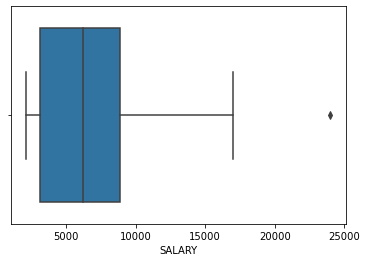

In [279]:
sns.boxplot(emp[['SALARY']])
plt.xlabel('SALARY')
plt.show()

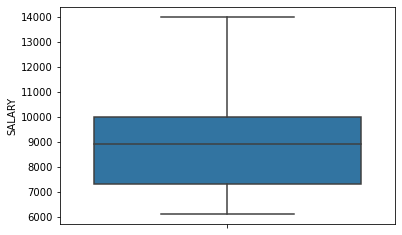

In [281]:
emp80 = emp[emp['DEPARTMENT_ID']==80]
sns.boxplot(y = emp80[['SALARY']])
plt.ylabel('SALARY')
plt.show()

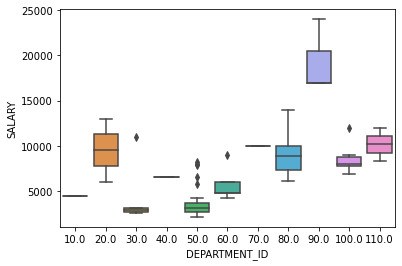

In [283]:
sns.boxplot(data=emp,x='DEPARTMENT_ID',y = 'SALARY')
plt.show()

In [287]:
empsalary = emp[['DEPARTMENT_NAME','SALARY']].groupby(['DEPARTMENT_NAME'],as_index=False).sum()
empsalary

,DEPARTMENT_NAME,SALARY
0,Accounting,20308
1,Administration,4400
2,Executive,58000
3,Finance,51608
4,Human Resources,6500
5,IT,28800
6,Marketing,19000
7,Public Relations,10000
8,Purchasing,24900
9,Sales,304500


Text(0, 0.5, 'count')

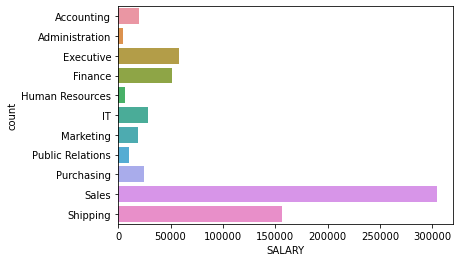

In [289]:
sns.barplot(data=empsalary,y='DEPARTMENT_NAME',x='SALARY')
plt.ylabel('count')

In [293]:
nam1

,NAM_VAO_LAM,EMPLOYEE_ID
0,2001,1
1,2002,7
2,2003,6
3,2004,10
4,2005,29
5,2006,24
6,2007,19
7,2008,11


<AxesSubplot:xlabel='NAM_VAO_LAM', ylabel='EMPLOYEE_ID'>

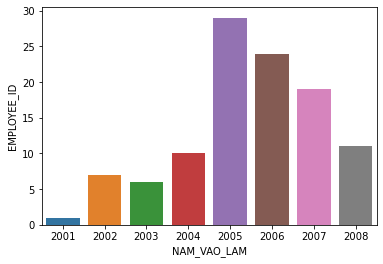

In [294]:
sns.barplot(data=nam1,x='NAM_VAO_LAM',y='EMPLOYEE_ID')

Text(0.5, 1.0, 'DEPARTMENT_NAME=Shipping')

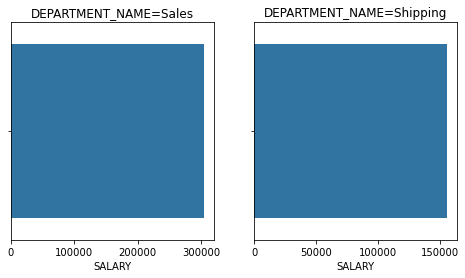

In [302]:
dep_sale = emp[emp['DEPARTMENT_NAME']=='Sales']
dep_Shipping = emp[emp['DEPARTMENT_NAME']=='Shipping']

dep_sale_sum = dep_sale[['DEPARTMENT_NAME','SALARY']].groupby(['DEPARTMENT_NAME'],as_index=False).sum()
dep_Shipping_sum = dep_Shipping[['DEPARTMENT_NAME','SALARY']].groupby(['DEPARTMENT_NAME'],as_index=False).sum()
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.barplot(dep_sale_sum['SALARY'])
plt.title('DEPARTMENT_NAME=Sales')
plt.subplot(1,2,2)
sns.barplot(dep_Shipping_sum['SALARY'])
plt.title('DEPARTMENT_NAME=Shipping')